In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
telecom= pd.read_csv('Telco_Customer_Churn.csv')


In [3]:
telecom.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
Gender = pd.get_dummies(telecom['gender'],drop_first=True)
partner = pd.get_dummies(telecom['Partner'],drop_first=True)
dependents = pd.get_dummies(telecom['Dependents'],drop_first=True)
Phone_service = pd.get_dummies(telecom['PhoneService'],drop_first=True)
multiple_lines = pd.get_dummies(telecom['MultipleLines'],drop_first=True)
internet = pd.get_dummies(telecom['InternetService'],drop_first=True)
online_sec = pd.get_dummies(telecom['OnlineSecurity'],drop_first=True)
online_backup = pd.get_dummies(telecom['OnlineBackup'],drop_first=True)
device_protect = pd.get_dummies(telecom['DeviceProtection'],drop_first=True)
tech_support = pd.get_dummies(telecom['TechSupport'],drop_first=True)
st_tv = pd.get_dummies(telecom['StreamingTV'],drop_first=True)
st_movies = pd.get_dummies(telecom['StreamingMovies'],drop_first=True)
contract = pd.get_dummies(telecom['Contract'],drop_first=True)
ppless_billing = pd.get_dummies(telecom['PaperlessBilling'],drop_first=True)
payment = pd.get_dummies(telecom['PaymentMethod'],drop_first=True)
churn = pd.get_dummies(telecom['Churn'],drop_first=True,prefix = 'churn')


telecom.drop(['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'],axis=1,inplace=True)#concatenate new sex and embark column to our train dataframe
telecom = pd.concat([telecom,Gender,
partner,
dependents,
Phone_service,
multiple_lines,
internet,
online_sec,
online_backup,
device_protect,
tech_support,
st_tv,
st_movies,
contract,
ppless_billing,
payment,
churn],axis=1)#check the head of dataframe


telecom.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Male,Yes,Yes,Yes,No phone service,Yes,...,Yes,No internet service,Yes,One year,Two year,Yes,Credit card (automatic),Electronic check,Mailed check,churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


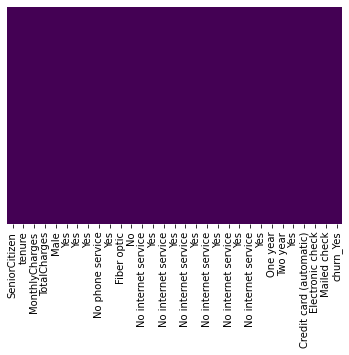

In [5]:
sns.heatmap(telecom.isnull(),yticklabels=False,cbar=False,cmap='viridis') #no NaN value

In [6]:
#sns.pairplot(telecom,hue='churn')

In [7]:
telecom.info

<bound method DataFrame.info of       SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Male  Yes  Yes  \
0                 0       1           29.85         29.85     0    1    0   
1                 0      34           56.95       1889.50     1    0    0   
2                 0       2           53.85        108.15     1    0    0   
3                 0      45           42.30       1840.75     1    0    0   
4                 0       2           70.70        151.65     0    0    0   
...             ...     ...             ...           ...   ...  ...  ...   
7027              0      24           84.80       1990.50     1    1    1   
7028              0      72          103.20       7362.90     0    1    1   
7029              0      11           29.60        346.45     0    1    1   
7030              1       4           74.40        306.60     1    1    0   
7031              0      66          105.65       6844.50     1    0    0   

      Yes  No phone service  Yes  ...  Yes 

In [8]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics


In [9]:
X=telecom.drop('churn_Yes',axis=1)
y=telecom['churn_Yes']

In [10]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)

DECISION TREE

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dtree = DecisionTreeClassifier() 

In [13]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
predictions = dtree.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [16]:
print(confusion_matrix(y_test,predictions))

[[1251  298]
 [ 269  292]]


In [17]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1549
           1       0.49      0.52      0.51       561

    accuracy                           0.73      2110
   macro avg       0.66      0.66      0.66      2110
weighted avg       0.74      0.73      0.73      2110



RANDOM FORESTS

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf = RandomForestClassifier(n_estimators = 200)

In [20]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [21]:
rf_pred = rf.predict(X_test)

In [22]:
print('Confusion matrix:''\n',confusion_matrix(y_test,rf_pred))
print(classification_report(y_test, rf_pred))


Confusion matrix:
 [[1388  161]
 [ 287  274]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.63      0.49      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



SVM LINEAR KERNEL

In [23]:
from sklearn.svm import SVC

In [24]:
svm_model=SVC()

In [25]:
svm_model.fit(X_train, y_train)

SVC()

In [26]:
#predictions
svm_pred = svm_model.predict(X_test)

In [27]:
print('Confusion matrix:''\n', confusion_matrix(y_test, svm_pred))

print('Classification report:', classification_report(y_test, svm_pred))      

Confusion matrix:
 [[1549    0]
 [ 561    0]]
Classification report:               precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
